In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2

df = pd.read_csv('C:/Users/User/PycharmProjects/oiad-1-2025/datasets/teen_phone_addiction_dataset.csv')
data = df["Screen_Time_Before_Bed"]
data.head()

#1
mean = data.mean()
var = data.var()
median = data.median()
mode = data.mode()[0]
q25, q50, q75 = data.quantile([0.25, 0.5, 0.75])
skew = stats.skew(data)
kurt = stats.kurtosis(data)
iqr = stats.iqr(data)

print(f"Среднее: {mean}")
print(f"Дисперсия: {var}")
print(f"Медиана: {median}")
print(f"Мода: {mode}")
print(f"Квантили: {q25}, {q50}, {q75}")
print(f"Асимметрия: {skew}")
print(f"Эксцесс: {kurt}")
print(f"IQR: {iqr}")

plt.hist(data,  bins = 1 + int(np.log2(len(data))), edgecolor='black')
plt.xlabel("Значение")
plt.ylabel("Количество наблюдений")
plt.show()

x_sorted = np.sort(data)
y = np.arange(1, len(x_sorted)+1) / len(x_sorted)

plt.step(x_sorted, y, where='post')
plt.title("Функция распределения")
plt.xlabel("Значение")
plt.ylabel("Доля наблюдений")
plt.show()

#Промежуточный вывод
# имеется некоторая асимметрия, небольшая - т.к. расчитанное значение асимметрии близко к нулю, а также это подтверждается графиком, где есть некоторое смещение вправо.
# значение дисперсии является умеренным, ибо относительно всех значений, большинство значений достаточно близки к среднему, т.е. количество наблюдаемых значений не раскидано по всей имеющейся облпсти
# значение эксцесса говорит о том, что в значениях 0-1.3 есть некоторая анномалия, которая говорит о колебаниях значений там, а не постепенного роста, как это было бы в графике нормального распределения, однако распределение достаточно близко к нормальному, что подтверждается гистограммой

Крит значение = 16.918977604620448
Расчётная статистика = 200.94224520406001


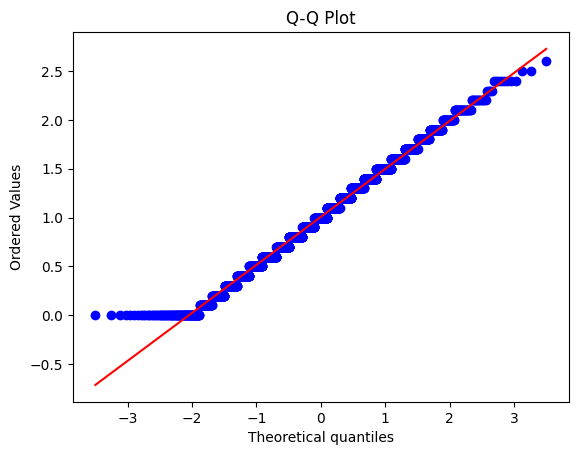

In [117]:
#2
n = len(data)
k = 1 + int(np.log2(n))
counts, bins = np.histogram(data, bins=k)
std = np.std(data)

p = norm.cdf(bins[1:], mean, std) - norm.cdf(bins[:-1], mean, std)
expected = n * p
chi2_stat = np.sum((counts - expected) ** 2 / expected)

dfreedom = k - 1 - 2
critical_value = chi2.ppf(0.95, dfreedom)
print(f"Крит значение = {critical_value}")
print(f"Расчётная статистика = {chi2_stat}")

stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

#из результатов подсчётов можно опровергнуть гипотезу о нормальности, однако по графику можно заметить подробности, которые соответствуют выводам прошлого задания: в самом начале идёт  отклонение от линии, однако затем идёт явное соответствие нормальному распределению, однако под конец идёт относительно лёгкое отклонение, что было заметно в предыдущем задании на гистограмме.
#касательно выполнение пункта про расчёт и анализ асимметрии и эксцесса - было выполнено в предыдущем задании, однако стоит заметить что их значения также соответствуют q-q plot

Среднее: 1.0142256482130343
Дисперсия: 0.19472921089469003
Медиана: 1.0
Мода: 1.0
Квантили: 0.7, 1.0, 1.3
Асимметрия: 0.05007448511077601
Эксцесс: -0.6817716652840251
IQR: 0.6000000000000001


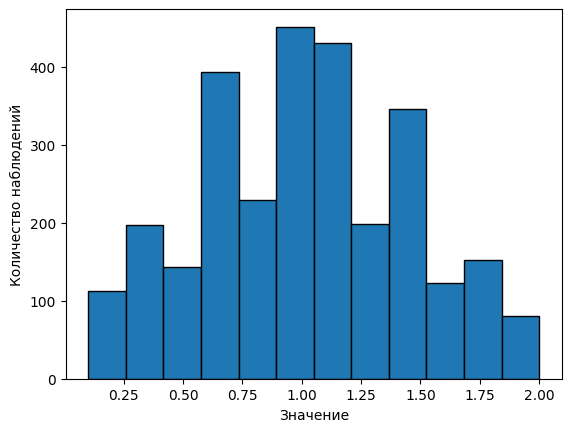

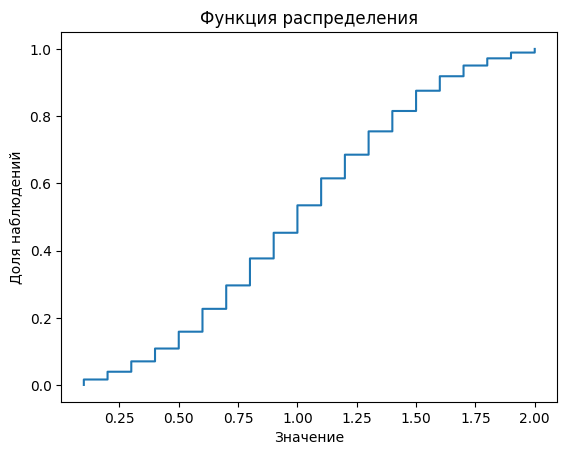

In [118]:
#3
#Удаление выбросов
q_low = data.quantile(0.01)
q_high = data.quantile(0.99)
data_trimmed = data[(data > q_low) & (data < q_high)]

mean = data_trimmed.mean()
var = data_trimmed.var()
median = data_trimmed.median()
mode = data_trimmed.mode()[0]
q25, q50, q75 = data_trimmed.quantile([0.25, 0.5, 0.75])
skew = stats.skew(data_trimmed)
kurt = stats.kurtosis(data_trimmed)
iqr = stats.iqr(data_trimmed)

print(f"Среднее: {mean}")
print(f"Дисперсия: {var}")
print(f"Медиана: {median}")
print(f"Мода: {mode}")
print(f"Квантили: {q25}, {q50}, {q75}")
print(f"Асимметрия: {skew}")
print(f"Эксцесс: {kurt}")
print(f"IQR: {iqr}")

plt.hist(data_trimmed,  bins = 1 + int(np.log2(len(data_trimmed))), edgecolor='black')
plt.xlabel("Значение")
plt.ylabel("Количество наблюдений")
plt.show()

x_sorted = np.sort(data_trimmed)
y = np.arange(1, len(x_sorted)+1) / len(x_sorted)

plt.step(x_sorted, y, where='post')
plt.title("Функция распределения")
plt.xlabel("Значение")
plt.ylabel("Доля наблюдений")
plt.show()

Крит значение = 16.918977604620448
Расчётная статистика = 329.9684110337683


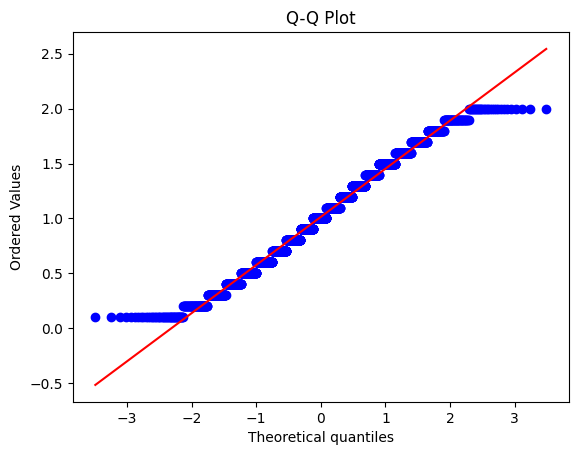

In [119]:
n = len(data_trimmed)
k = 1 + int(np.log2(n))
counts, bins = np.histogram(data_trimmed, bins=k)
std = np.std(data_trimmed)

p = norm.cdf(bins[1:], mean, std) - norm.cdf(bins[:-1], mean, std)
expected = n * p
chi2_stat = np.sum((counts - expected) ** 2 / expected)

dfreedom = k - 1 - 2
critical_value = chi2.ppf(0.95, dfreedom)
print(f"Крит значение = {critical_value}")
print(f"Расчётная статистика = {chi2_stat}")

stats.probplot(data_trimmed, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# в результате дисперсия улучшилась, асимметрия уменьшилась, но значение эксцесса увеличилось (по модулю), от чего и возможно ухудшения результатов расчётной статистики

Среднее: 1.0047666666666666
Дисперсия: 0.23809330999221962
Медиана: 1.0
Мода: 1.0
Квантили: 0.7, 1.0, 1.4
Асимметрия: 0.0363072008014866
Эксцесс: -0.504022222616431
IQR: 0.7


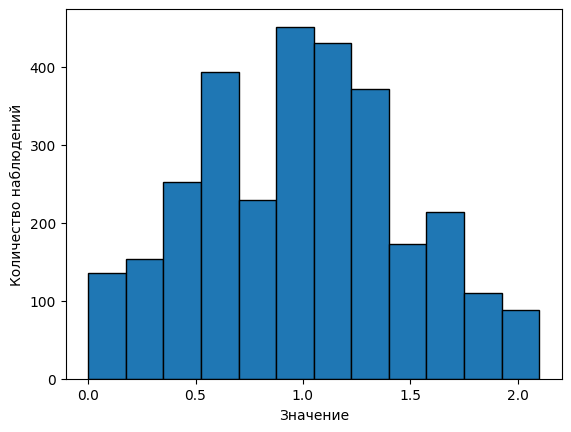

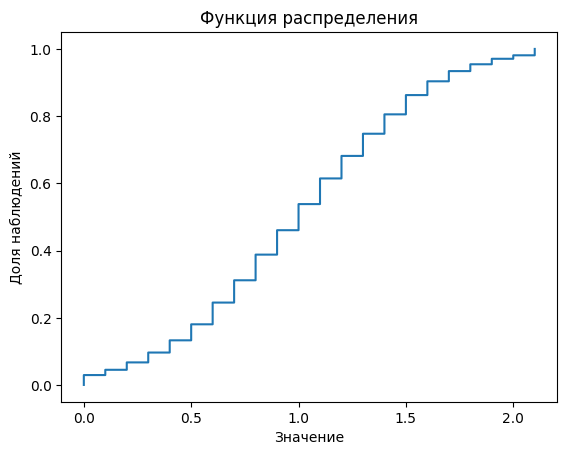

Крит значение = 16.918977604620448
Расчётная статистика = 216.00749998153256


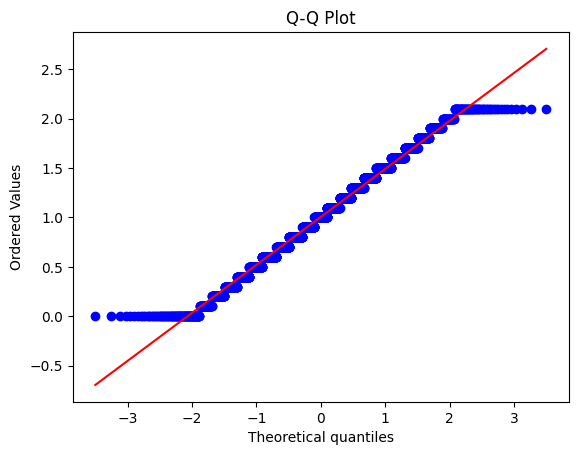

In [109]:
#усечение выбросов
q_low = data.quantile(0.01)
q_high = data.quantile(0.99)
data_wins = data.clip(lower=q_low, upper=q_high)

mean = data_wins.mean()
var = data_wins.var()
median = data_wins.median()
mode = data_wins.mode()[0]
q25, q50, q75 = data_wins.quantile([0.25, 0.5, 0.75])
skew = stats.skew(data_wins)
kurt = stats.kurtosis(data_wins)
iqr = stats.iqr(data_wins)

print(f"Среднее: {mean}")
print(f"Дисперсия: {var}")
print(f"Медиана: {median}")
print(f"Мода: {mode}")
print(f"Квантили: {q25}, {q50}, {q75}")
print(f"Асимметрия: {skew}")
print(f"Эксцесс: {kurt}")
print(f"IQR: {iqr}")

plt.hist(data_wins,  bins = 1 + int(np.log2(len(data_wins))), edgecolor='black')
plt.xlabel("Значение")
plt.ylabel("Количество наблюдений")
plt.show()

x_sorted = np.sort(data_wins)
y = np.arange(1, len(x_sorted)+1) / len(x_sorted)

plt.step(x_sorted, y, where='post')
plt.title("Функция распределения")
plt.xlabel("Значение")
plt.ylabel("Доля наблюдений")
plt.show()

n = len(data_wins)
k = 1 + int(np.log2(n))
counts, bins = np.histogram(data_wins, bins=k)
std = np.std(data_wins)

p = norm.cdf(bins[1:], mean, std) - norm.cdf(bins[:-1], mean, std)
expected = n * p
chi2_stat = np.sum((counts - expected) ** 2 / expected)

dfreedom = k - 1 - 2
critical_value = chi2.ppf(0.95, dfreedom)
print(f"Крит значение = {critical_value}")
print(f"Расчётная статистика = {chi2_stat}")

stats.probplot(data_wins, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

#также результат неудовлетворительный но лучше чем при удалении, немного улучшилась дисперсия, значительно ухудшилось значение эксцесса

Среднее: -2.839210348308067e-16
Дисперсия: 1.000333444481494
Медиана: -0.01366352806348085
Мода: -0.01366352806348085
Квантили: -0.6224345803967729, -0.01366352806348085, 0.7980312083809082
Асимметрия: 0.09837930491959027
Эксцесс: -0.35033868704647464
IQR: 1.420465788777681


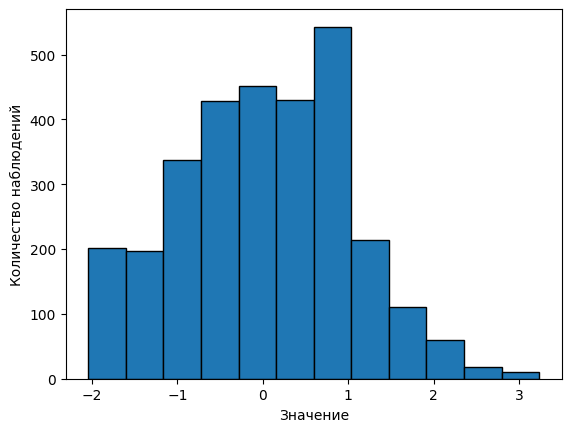

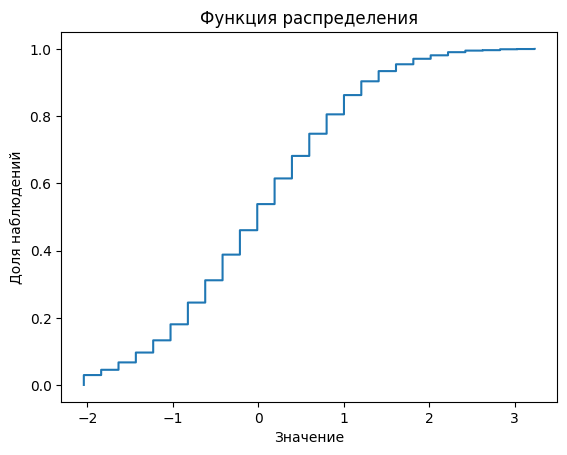

Крит значение = 16.918977604620448
Расчётная статистика = 200.94224520406019


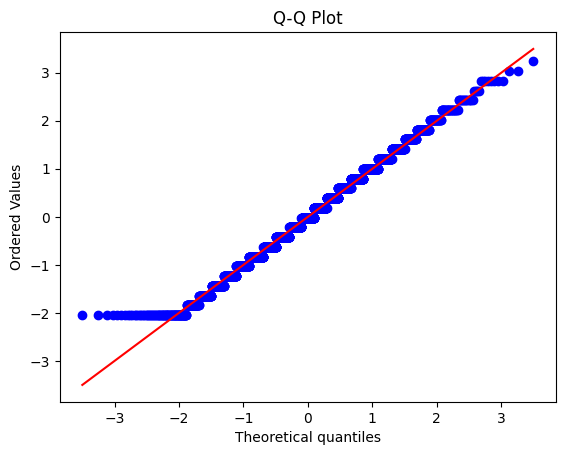

In [110]:
#Стандартизация
from scipy.stats import zscore

#data_std = (data - data.min()) / (data.max() - data.min())
data_std = pd.Series(zscore(data))

mean = data_std.mean()
var = data_std.var()
median = data_std.median()
mode = data_std.mode()[0]
q25, q50, q75 = data_std.quantile([0.25, 0.5, 0.75])
skew = stats.skew(data_std)
kurt = stats.kurtosis(data_std)
iqr = stats.iqr(data_std)

print(f"Среднее: {mean}")
print(f"Дисперсия: {var}")
print(f"Медиана: {median}")
print(f"Мода: {mode}")
print(f"Квантили: {q25}, {q50}, {q75}")
print(f"Асимметрия: {skew}")
print(f"Эксцесс: {kurt}")
print(f"IQR: {iqr}")

plt.hist(data_std,  bins = 1 + int(np.log2(len(data_std))), edgecolor='black')
plt.xlabel("Значение")
plt.ylabel("Количество наблюдений")
plt.show()

x_sorted = np.sort(data_std)
y = np.arange(1, len(x_sorted)+1) / len(x_sorted)

plt.step(x_sorted, y, where='post')
plt.title("Функция распределения")
plt.xlabel("Значение")
plt.ylabel("Доля наблюдений")
plt.show()

n = len(data_std)
k = 1 + int(np.log2(n))
counts, bins = np.histogram(data_std, bins=k)
std = np.std(data_std)

p = norm.cdf(bins[1:], mean, std) - norm.cdf(bins[:-1], mean, std)
expected = n * p
chi2_stat = np.sum((counts - expected) ** 2 / expected)

dfreedom = k - 1 - 2
critical_value = chi2.ppf(0.95, dfreedom)
print(f"Крит значение = {critical_value}")
print(f"Расчётная статистика = {chi2_stat}")

stats.probplot(data_std, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

#также не привело к нормальному виду, а только ухудшило результат, несмотря на то что никак не повлияло на эксцесс и асимметрию, однако явно ухудшило дисперсию и интерквартильный размах

Среднее: 0.6642286575330765
Дисперсия: 0.0676949162989178
Медиана: 0.6931471805599453
Мода: 0.6931471805599453
Квантили: 0.5306282510621704, 0.6931471805599453, 0.8754687373538999
Асимметрия: -0.532815109648025
Эксцесс: -0.03805762626270237
IQR: 0.3448404862917295


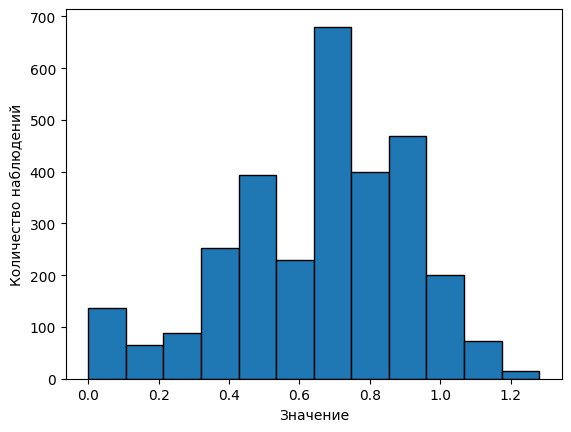

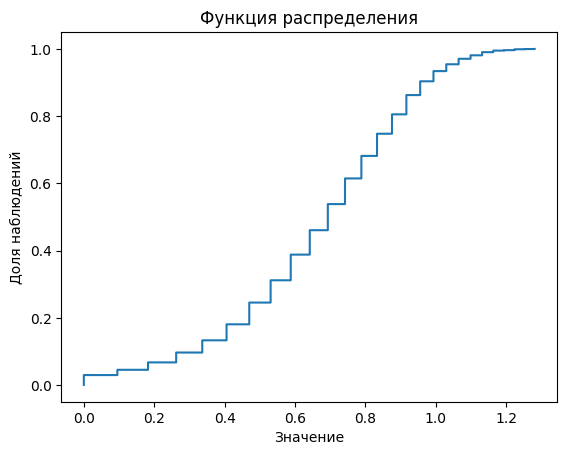

Крит значение = 16.918977604620448
Расчётная статистика = 673.3823148540463


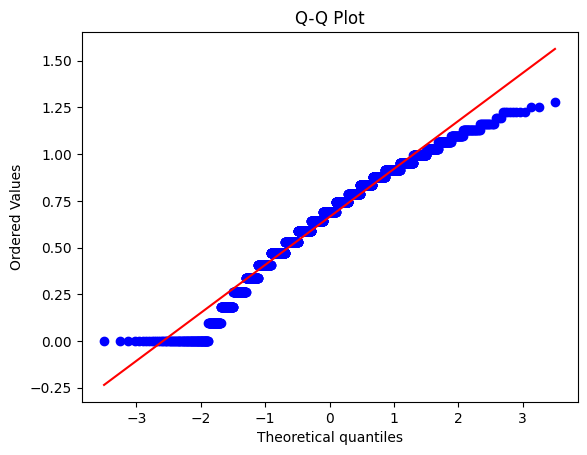

In [111]:
data_log = np.log1p(data)

mean = data_log.mean()
var = data_log.var()
median = data_log.median()
mode = data_log.mode()[0]
q25, q50, q75 = data_log.quantile([0.25, 0.5, 0.75])
skew = stats.skew(data_log)
kurt = stats.kurtosis(data_log)
iqr = stats.iqr(data_log)

print(f"Среднее: {mean}")
print(f"Дисперсия: {var}")
print(f"Медиана: {median}")
print(f"Мода: {mode}")
print(f"Квантили: {q25}, {q50}, {q75}")
print(f"Асимметрия: {skew}")
print(f"Эксцесс: {kurt}")
print(f"IQR: {iqr}")

plt.hist(data_log,  bins = 1 + int(np.log2(len(data_log))), edgecolor='black')
plt.xlabel("Значение")
plt.ylabel("Количество наблюдений")
plt.show()

x_sorted = np.sort(data_log)
y = np.arange(1, len(x_sorted)+1) / len(x_sorted)

plt.step(x_sorted, y, where='post')
plt.title("Функция распределения")
plt.xlabel("Значение")
plt.ylabel("Доля наблюдений")
plt.show()

n = len(data_log)
k = 1 + int(np.log2(n))
counts, bins = np.histogram(data_log, bins=k)
std = np.std(data_log)

p = norm.cdf(bins[1:], mean, std) - norm.cdf(bins[:-1], mean, std)
expected = n * p
chi2_stat = np.sum((counts - expected) ** 2 / expected)

dfreedom = k - 1 - 2
critical_value = chi2.ppf(0.95, dfreedom)
print(f"Крит значение = {critical_value}")
print(f"Расчётная статистика = {chi2_stat}")

stats.probplot(data_log, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

#результат также неудовлетворительный - ассиметрия возросла, хоть и дисперсия уменьшилась до низких значений, а также значение эксцесса стало ближе к 0, также уменьшился интерквартильный размах

#В качестве вывода можно сказать, что, используя техники обработки данных, привести данные к нормальному распределению не удалось

Среднее значение и дисперсия:
               mean    var
School_Grade              
10th          1.021  0.241
11th          1.023  0.234
12th          0.982  0.244
7th           1.007  0.255
8th           1.005  0.241
9th           1.005  0.244


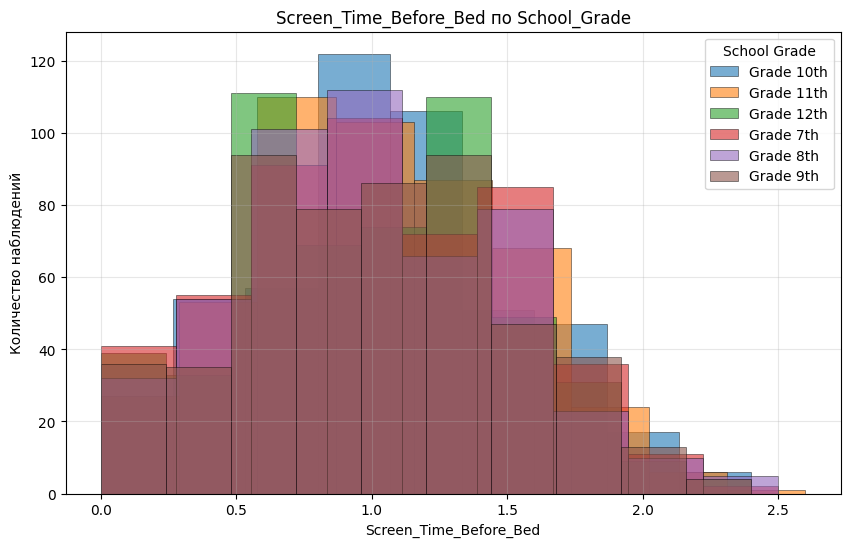

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/User/PycharmProjects/oiad-1-2025/datasets/teen_phone_addiction_dataset.csv')
group_col = "School_Grade"
number_col = "Screen_Time_Before_Bed"
groups = df.groupby(group_col)[number_col]
groups = df.groupby(group_col)[number_col]

stats_by_group = groups.agg(['mean', 'var']).round(3)
print("Среднее значение и дисперсия:")
print(stats_by_group)

plt.figure(figsize=(10, 6))
for i, (grade, subset) in enumerate(groups):
    k = 1 + int(np.log2(len(subset)))
    plt.hist(subset, bins=k, alpha=0.6, label=f"Grade {grade}",
             edgecolor='black', linewidth=0.5)
plt.xlabel(number_col)
plt.ylabel("Количество наблюдений")
plt.title("Screen_Time_Before_Bed по School_Grade")
plt.legend(title="School Grade")
plt.grid(alpha=0.3)
plt.show()

'''
Средние значения времени перед сном близки к 1, различия незначительны, дисперсии также близки друг к другу (0.234–0.255) значит разброс данных в каждом классе примерно одинаков.
Как результат, можно сказать, что среднее время перед сном не сильно зависит от класса, что видно на гистограмме (ибо графики достаточно сильно сливаются, имеют схожую структуру, отличаясь лишь в пиковом по количеству наблюдений значений, но сам пик у всех классов близок к 1 часу).
'''